# DAO2702 Project: K-Drama Recommendations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Top_500_popular_drama_details_from_mydramalist.csv')
df.head()

,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,main_role,support_role,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,reviewer_gender_info
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,424,172175,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo...",390,5962,grim reaper - (sunny; bromance; shin; relation...,2797,"age gap - (lead), grim reaper, female lead, ye...",1061,"Counter({'': 226, 'usa': 13, 'united states': ...","Counter({'female': 299, '': 52, 'male': 38})"
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",310,159377,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,"Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W...",289,4215,"female lead - (character), male lead - (second...",1905,"serial killer - (plot), female lead, watch dra...",1012,"Counter({'': 178, 'united states': 8, 'usa': 6...","Counter({'female': 207, '': 53, 'male': 29})"
2,2,descendants of the sun,A love story that develops between a surgeon a...,254,146066,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Female Lead, Multiple Couples, Bro...",...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ...",239,3521,"watch drama - (start; want), second lead - (co...",1553,"watch drama - (time), female lead, think drama...",710,"Counter({'': 137, 'india': 8, 'usa': 6, 'phili...","Counter({'female': 187, '': 30, 'male': 22})"
3,3,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,246,144935,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J...",233,3550,"love story - (character), really good, fall lo...",1869,"watch drama, eat disorder, character really, s...",630,"Counter({'': 126, 'usa': 9, 'united states': 4...","Counter({'female': 170, '': 39, 'male': 24})"
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",266,139758,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,"Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S...",247,4316,"watch drama, love story, best drama - (watch),...",1637,"second half, watch drama - (never), plot hole,...",1008,"Counter({'': 139, 'usa': 5, 'philippines': 5, ...","Counter({'female': 182, '': 44, 'male': 21})"


## Preprocessing

1. Exclude non-kdrama data points
2. Limit the date range to past 5-10 years

In [88]:
is_kdrama = df['country'] == 'South Korea'
is_recent = df['year'] >= 2010
final_df = df[is_kdrama & is_recent]
print(final_df.shape)
final_df.head()

(358, 33)


,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,main_role,support_role,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,reviewer_gender_info
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,424,172175,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo...",390,5962,grim reaper - (sunny; bromance; shin; relation...,2797,"age gap - (lead), grim reaper, female lead, ye...",1061,"Counter({'': 226, 'usa': 13, 'united states': ...","Counter({'female': 299, '': 52, 'male': 38})"
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",310,159377,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,"Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W...",289,4215,"female lead - (character), male lead - (second...",1905,"serial killer - (plot), female lead, watch dra...",1012,"Counter({'': 178, 'united states': 8, 'usa': 6...","Counter({'female': 207, '': 53, 'male': 29})"
2,2,descendants of the sun,A love story that develops between a surgeon a...,254,146066,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Female Lead, Multiple Couples, Bro...",...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ...",239,3521,"watch drama - (start; want), second lead - (co...",1553,"watch drama - (time), female lead, think drama...",710,"Counter({'': 137, 'india': 8, 'usa': 6, 'phili...","Counter({'female': 187, '': 30, 'male': 22})"
3,3,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,246,144935,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J...",233,3550,"love story - (character), really good, fall lo...",1869,"watch drama, eat disorder, character really, s...",630,"Counter({'': 126, 'usa': 9, 'united states': 4...","Counter({'female': 170, '': 39, 'male': 24})"
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",266,139758,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,"Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S...",247,4316,"watch drama, love story, best drama - (watch),...",1637,"second half, watch drama - (never), plot hole,...",1008,"Counter({'': 139, 'usa': 5, 'philippines': 5, ...","Counter({'female': 182, '': 44, 'male': 21})"


## Genre v.s. Viewership

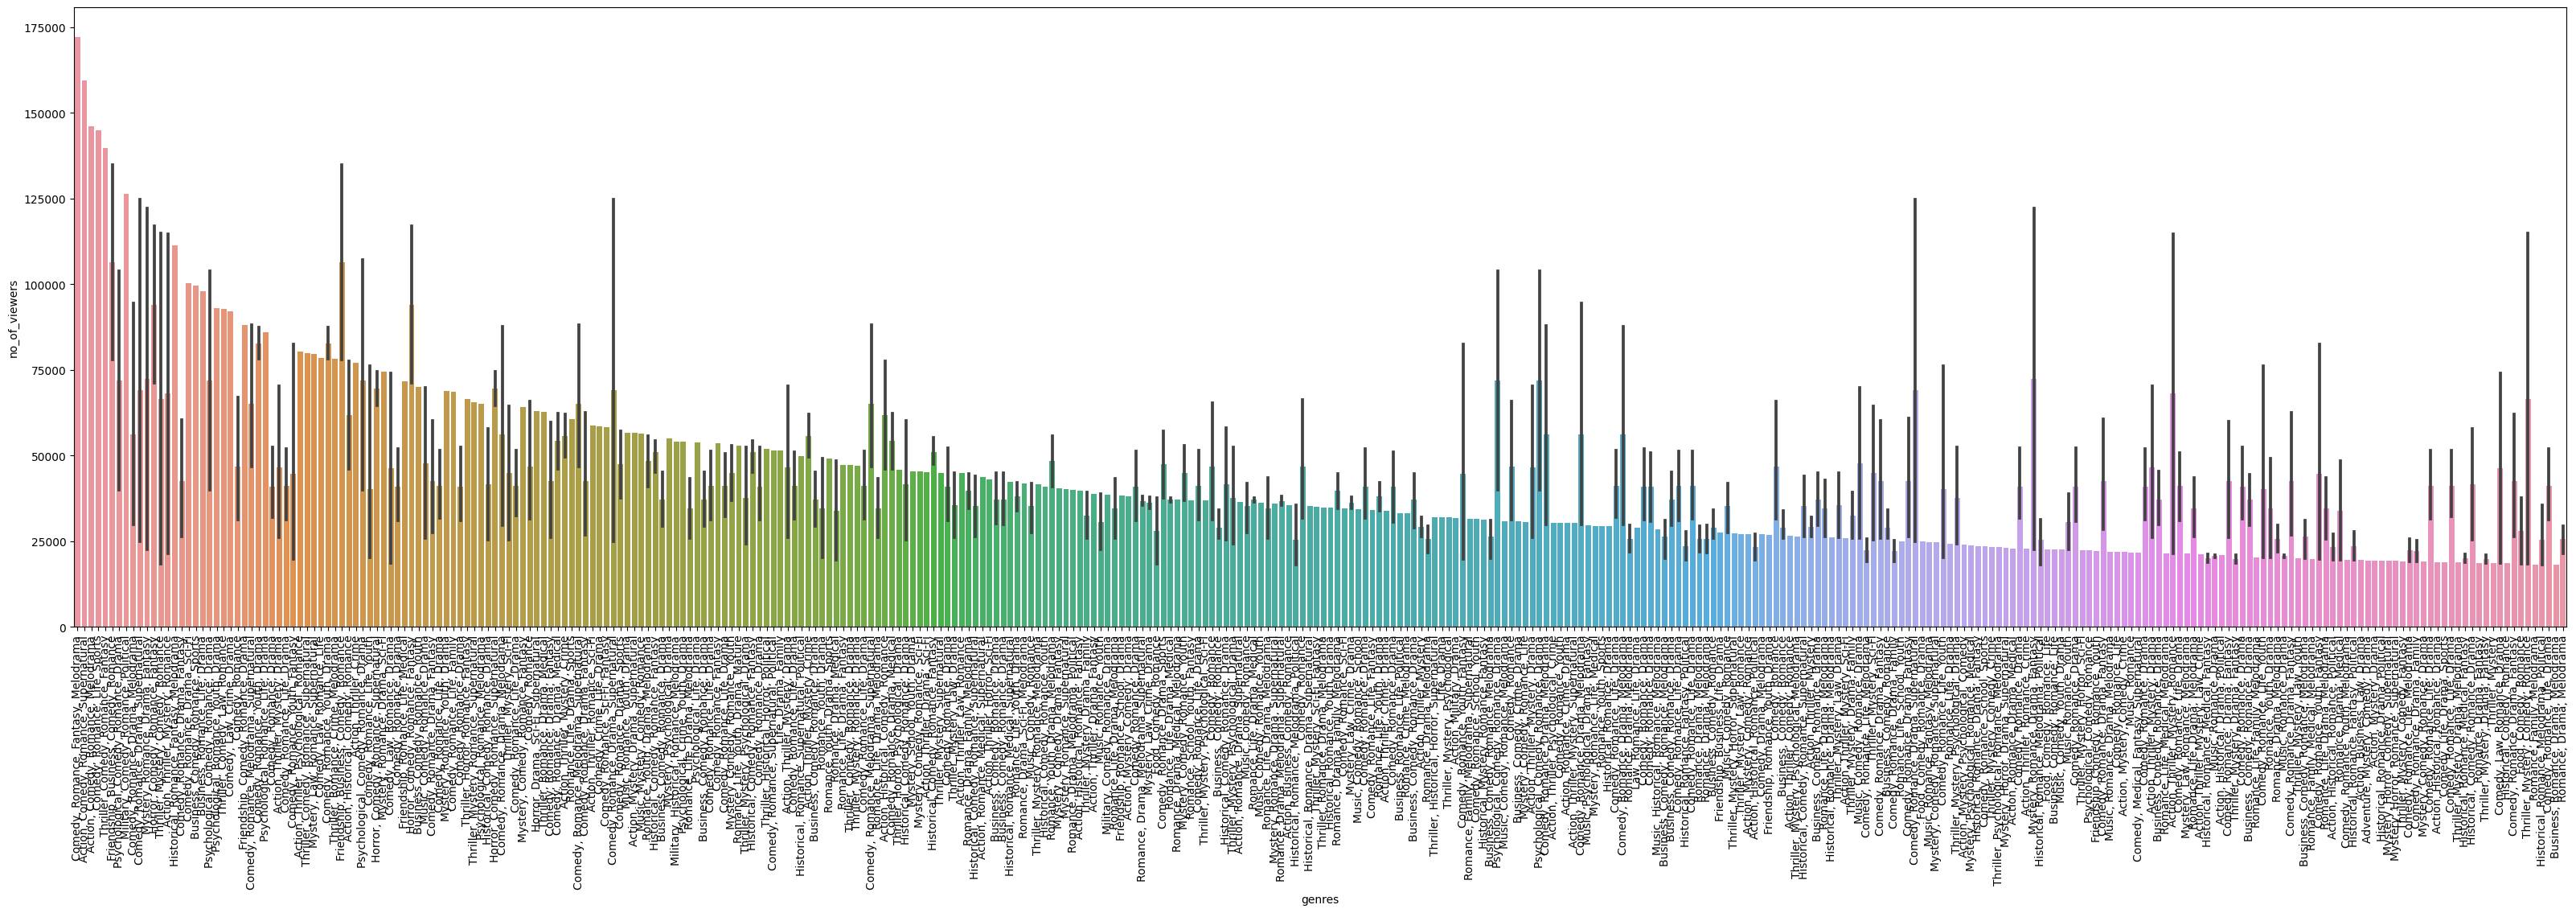

In [3]:
# Plot genre against number of viewers
plt.figure(figsize=(40, 10))
sns.barplot(x='genres', y='no_of_viewers', data=final_df, order=final_df.sort_values('no_of_viewers', ascending=False).genres)
plt.xticks(rotation=90)
plt.show()

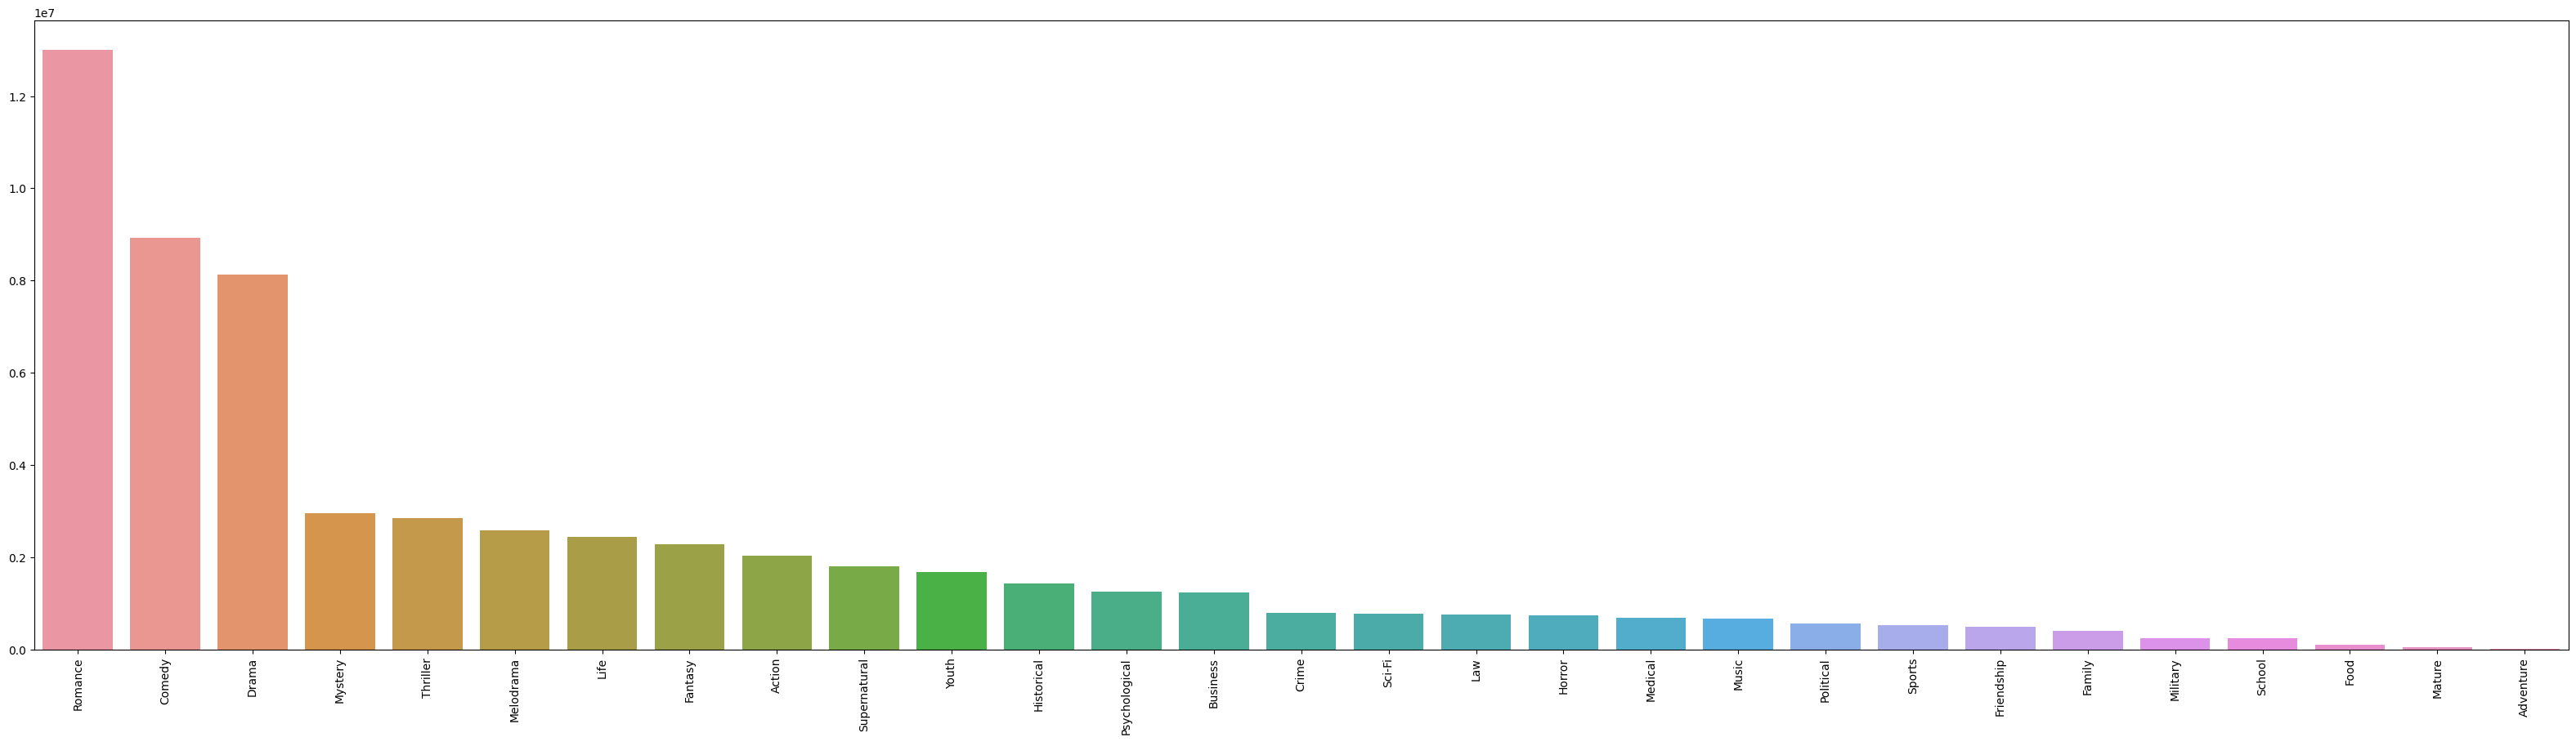

In [13]:
from collections import defaultdict

# Count the number of views for each genre
view_counts_by_genre = defaultdict(int)
for index, row in final_df.iterrows():
    genres = row['genres'].split(', ')
    for genre in genres:
        view_counts_by_genre[genre] += row['no_of_viewers']

# Plot the number of views for each genre
plt.figure(figsize=(40, 10))
sns.barplot(x=list(view_counts_by_genre.keys()), \
            y=list(view_counts_by_genre.values()), \
            order=sorted(view_counts_by_genre, key=view_counts_by_genre.get, reverse=True))
plt.xticks(rotation=90)
plt.show()

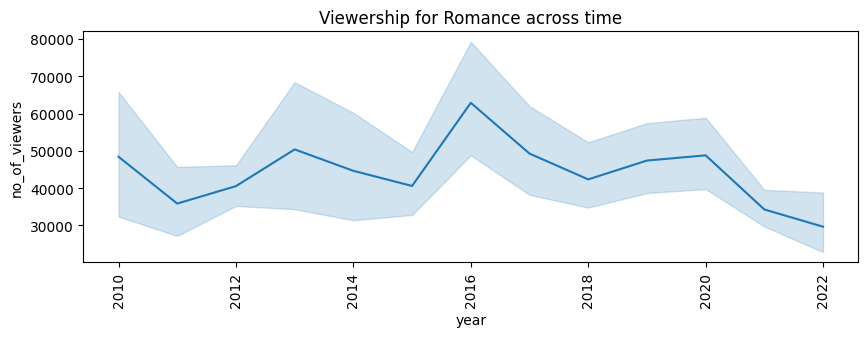

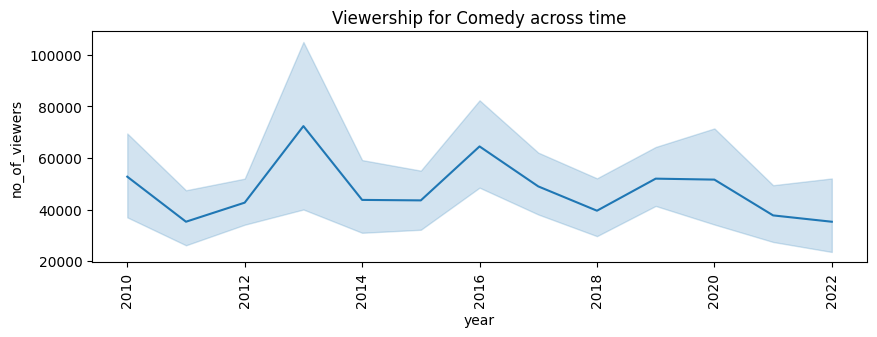

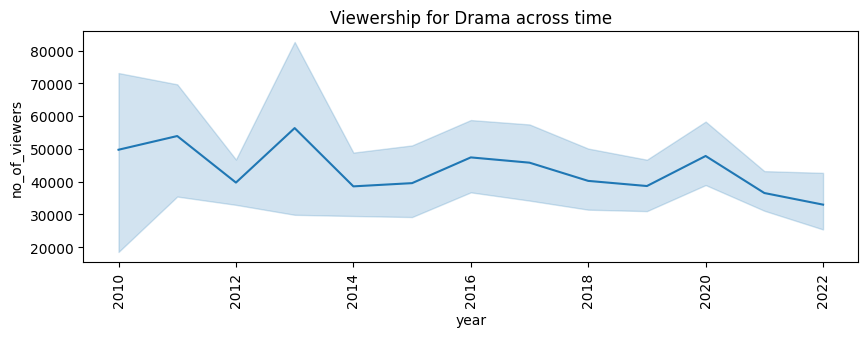

In [20]:
def plot_viewership_by_genre(genre):
	# Plot number of views for romance genre over time
	genre_df = final_df[final_df['genres'].str.contains(genre)]
	plt.figure(figsize=(10, 3))
	sns.lineplot(x='year', y='no_of_viewers', data=genre_df)
	plt.xticks(rotation=90)
	plt.title(f"Viewership for {genre} across time")
	plt.show()

plot_viewership_by_genre('Romance')
plot_viewership_by_genre('Comedy')
plot_viewership_by_genre('Drama')

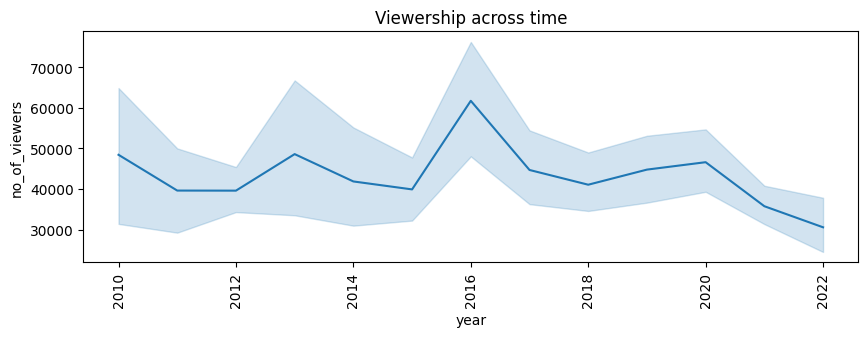

In [21]:
# Plot number of viewers over time
plt.figure(figsize=(10, 3))
sns.lineplot(x='year', y='no_of_viewers', data=final_df)
plt.xticks(rotation=90)
plt.title("Viewership across time")
plt.show()

In [71]:
# Count the number of views for each genre
new_rows = []
for index, row in final_df.iterrows():
    genres = row['genres'].split(', ')
    for genre in genres:
        new_row = [row['name'], genre, row['year'], row['no_of_viewers'], row['rating']]
        new_rows.append(new_row)

# convert new_rows to a dataframe
new_df = pd.DataFrame(new_rows, columns=['name', 'genre', 'year', 'no_of_viewers', 'rating'])
new_df

,name,genre,year,no_of_viewers,rating
0,goblin,Comedy,2016,172175,8.8
1,goblin,Romance,2016,172175,8.8
2,goblin,Fantasy,2016,172175,8.8
3,goblin,Melodrama,2016,172175,8.8
4,strong woman do bong soon,Action,2017,159377,8.7
...,...,...,...,...,...
1347,high-end crush,Drama,2015,20798,7.8
1348,revolutionary love,Business,2017,20511,7.5
1349,revolutionary love,Comedy,2017,20511,7.5
1350,revolutionary love,Romance,2017,20511,7.5


In [72]:
# Group by genre and year
# grouped_df = new_df.groupby(['genre', 'year']).mean()
# display(grouped_df)

# Plot the year against number of viewers, using a different colour for each genre
# plt.figure(figsize=(30, 10))
# sns.lineplot(x='year', y='no_of_viewers', hue='genre', data=grouped_df.reset_index())
# plt.xticks(rotation=90)
# plt.title("Viewership across time")
# plt.show()

In [73]:
# Group by genre
genre_grouped_df = new_df.groupby(['genre']).mean().sort_values('no_of_viewers', ascending=False)
genre_grouped_df.head(10)

/var/folders/hn/7csgv26s5tbb6gz4mb4nnxzm0000gn/T/ipykernel_36900/3469085630.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_grouped_df = new_df.groupby(['genre']).mean().sort_values('no_of_viewers', ascending=False)


,year,no_of_viewers,rating
genre,,,
Military,2017.500000,62679.250000,8.725000
Friendship,2018.125000,60930.750000,8.137500
Sports,2016.444444,57809.888889,8.200000
Mature,2021.000000,52848.000000,7.500000
Psychological,2017.360000,50143.280000,8.436000
Supernatural,2016.055556,49939.416667,8.186111
Horror,2018.533333,49369.600000,8.346667
Comedy,2016.586957,48552.211957,8.091304
Fantasy,2017.893617,48460.978723,8.212766


In [84]:
k = 5
top_k_genres = list(genre_grouped_df.head(k).index)
top_k_genres

['Military', 'Friendship', 'Sports', 'Mature', 'Psychological']

In [85]:
# Group by genre and year
new_k_genre_df = new_df[new_df['genre'].isin(top_k_genres)]
grouped_k_genre_df = new_k_genre_df.groupby(['genre', 'year']).mean()
grouped_k_genre_df.head(20)

/var/folders/hn/7csgv26s5tbb6gz4mb4nnxzm0000gn/T/ipykernel_36900/649908953.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_k_genre_df = new_k_genre_df.groupby(['genre', 'year']).mean()


no_of_viewers    rating
genre         year                         
Friendship    2014   27413.000000  8.700000
              2015   88011.000000  8.100000
              2017   22143.000000  8.000000
              2018  134897.000000  8.500000
              2019   78054.000000  8.200000
              2020   71729.000000  9.100000
              2021   32599.500000  7.250000
Mature        2021   52848.000000  7.500000
Military      2012   38441.000000  8.200000
              2018   54140.000000  8.900000
              2019  126390.000000  9.000000
              2021   31746.000000  8.800000
Psychological 2014   43560.333333  8.466667
              2015   49936.000000  8.175000
              2016   53071.750000  7.800000
              2017   48470.000000  8.550000
              2018   50437.400000  8.760000
              2019   45880.000000  8.700000
              2020   91168.500000  8.750000
              2021   34604.333333  8.700000

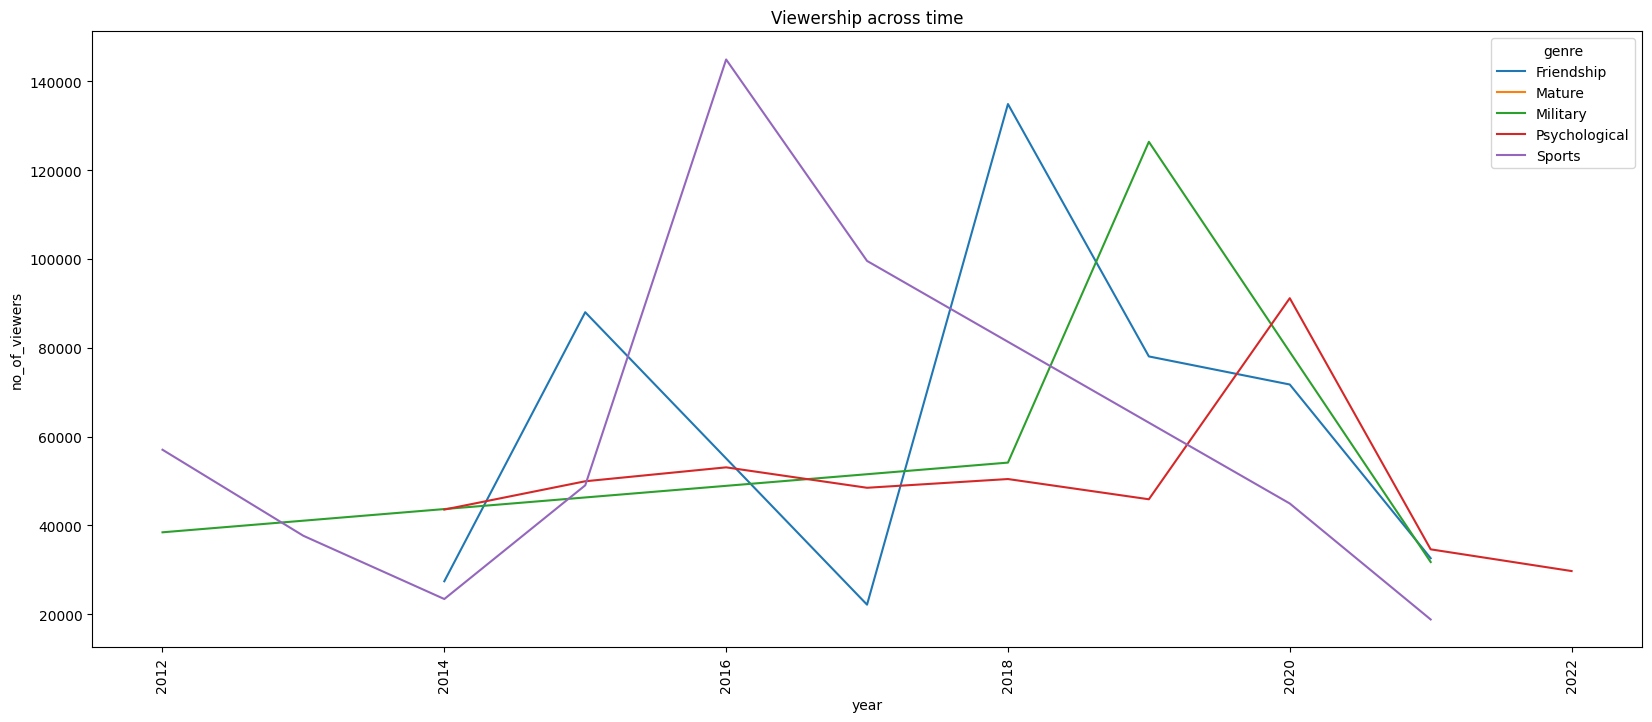

In [86]:
# Plot the year against number of viewers, using a different colour for each genre
# plt.figure(figsize=(20, 8))
# sns.lineplot(x='year', y='no_of_viewers', hue='genre', data=grouped_10_genre_df.reset_index())
# plt.xticks(rotation=90)
# plt.title("Viewership across time")
# plt.show()

def plot(x, y, hue, df, title, rotation=90):
	plt.figure(figsize=(20, 8))
	sns.lineplot(x=x, y=y, hue=hue, data=df.reset_index())
	plt.xticks(rotation=rotation)
	plt.title(title)
	plt.show()

plot('year', 'no_of_viewers', 'genre', grouped_k_genre_df, "Viewership across time")

## Genre v.s. Rating

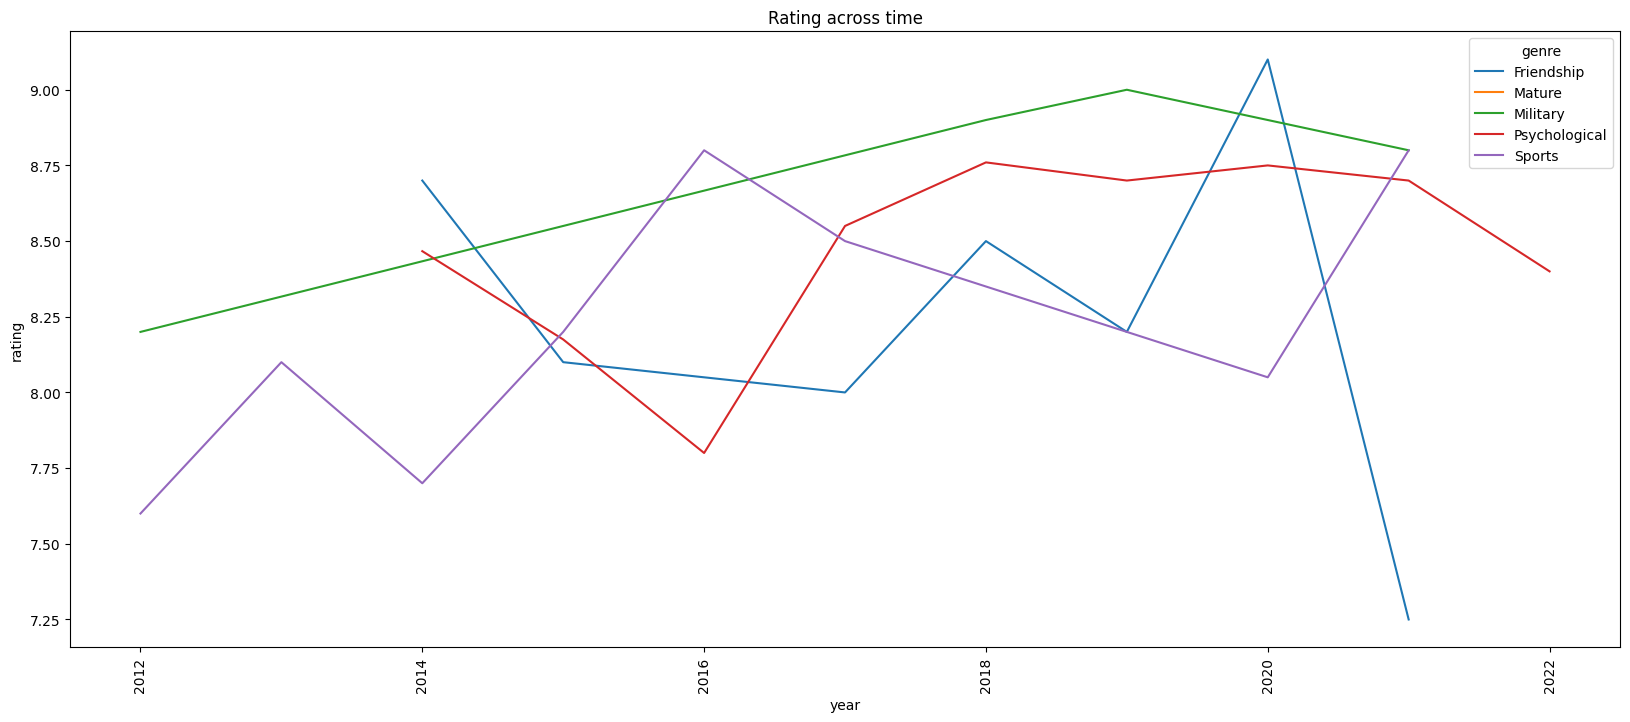

In [87]:
plot('year', 'rating', 'genre', grouped_k_genre_df, "Rating across time")